<a href="https://colab.research.google.com/github/Yash-Jaiswal28/Deep-Learning/blob/main/Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,regularizers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

## Creating a CNN model

In [7]:
#CNN Model

model =Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history =model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 85s 124ms/step - loss: 0.6517 - accuracy: 0.6255 - val_loss: 0.5552 - val_accuracy: 0.7216
Epoch 2/10
625/625 [==============================] - 77s 121ms/step - loss: 0.4905 - accuracy: 0.7613 - val_loss: 0.4473 - val_accuracy: 0.7918
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3807 - accuracy: 0.8282 - val_loss: 0.4690 - val_accuracy: 0.8062
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.2490 - accuracy: 0.8934 - val_loss: 0.6983 - val_accuracy: 0.7924
Epoch 5/10
625/625 [==============================] - 61s 97ms/step - loss: 0.1388 - accuracy: 0.9449 - val_loss: 0.9485 - val_accuracy: 0.7580
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0899 - accuracy: 0.9671 - val_loss: 0.8126 - val_accuracy: 0.7840
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0590 - accuracy: 0.9791 - val_loss: 1.1538 - val_accura

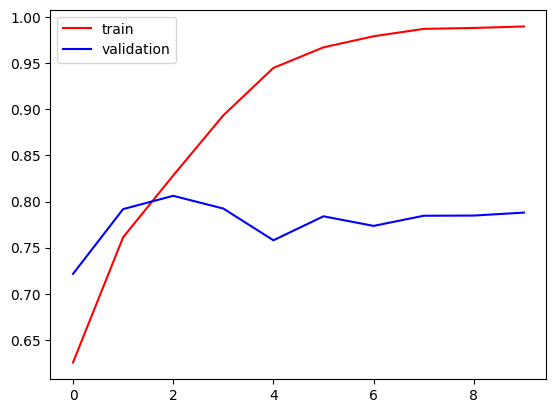

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

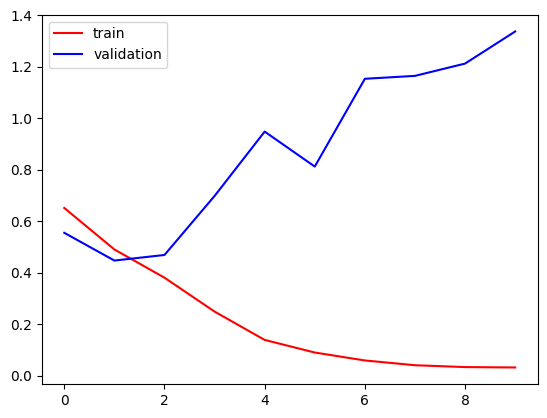

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Trying to reduce the Over_fitting

In [15]:
#CNN Model


model = Sequential()

# Conv2D layers with L1 regularization
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3), kernel_regularizer=regularizers.l1(l1=0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

# Dense layers with L1 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l1=0.001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# ... your training code here ...


In [16]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 122ms/step - loss: 18.8871 - accuracy: 0.5749 - val_loss: 8.8025 - val_accuracy: 0.5986
Epoch 2/10
625/625 [==============================] - 85s 135ms/step - loss: 7.8152 - accuracy: 0.5926 - val_loss: 6.6745 - val_accuracy: 0.5692
Epoch 3/10
625/625 [==============================] - 68s 107ms/step - loss: 5.1199 - accuracy: 0.6082 - val_loss: 4.1655 - val_accuracy: 0.5396
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 3.5922 - accuracy: 0.6518 - val_loss: 3.0711 - val_accuracy: 0.6380
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 2.9246 - accuracy: 0.6776 - val_loss: 2.7261 - val_accuracy: 0.6754
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 2.5770 - accuracy: 0.7021 - val_loss: 2.5024 - val_accuracy: 0.7092
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 2.4260 - accuracy: 0.7336 - val_loss: 2.4868 - val_a

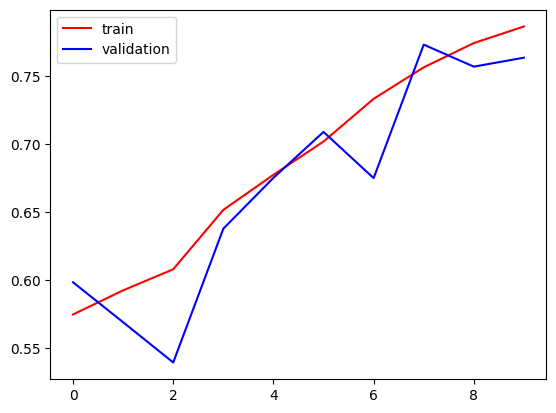

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

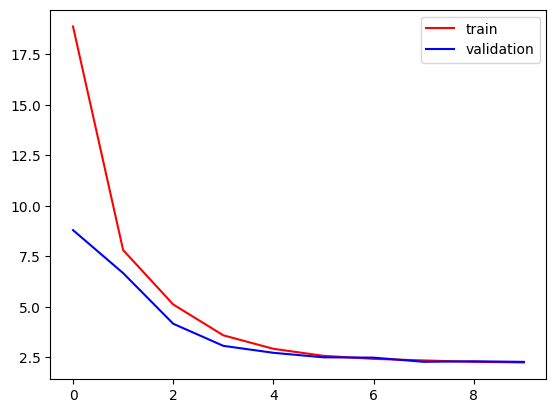

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()